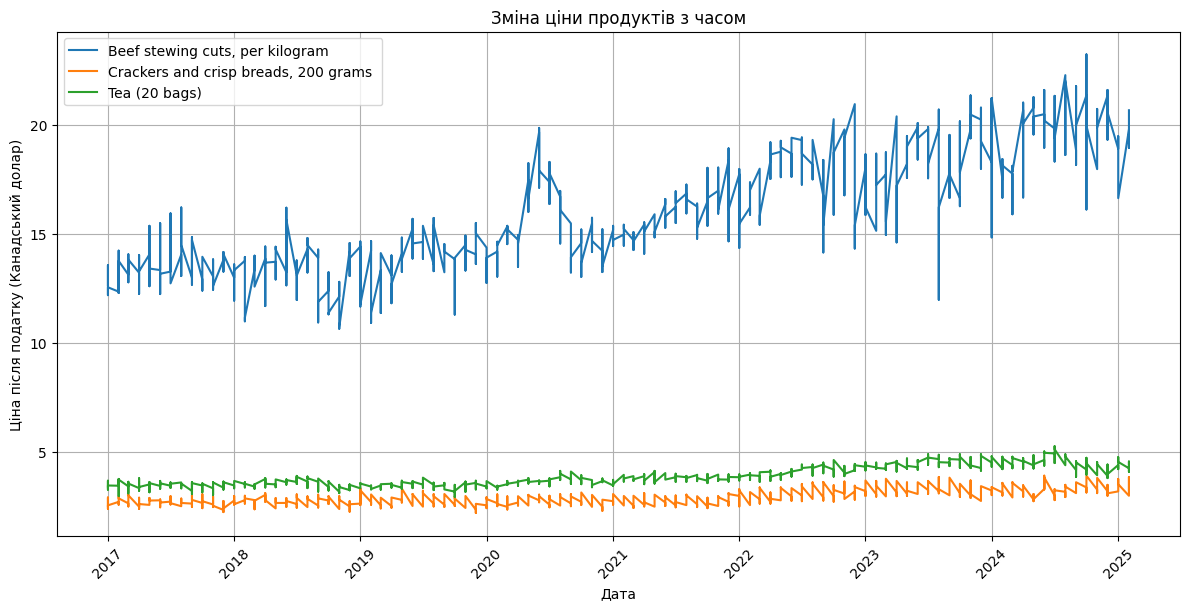

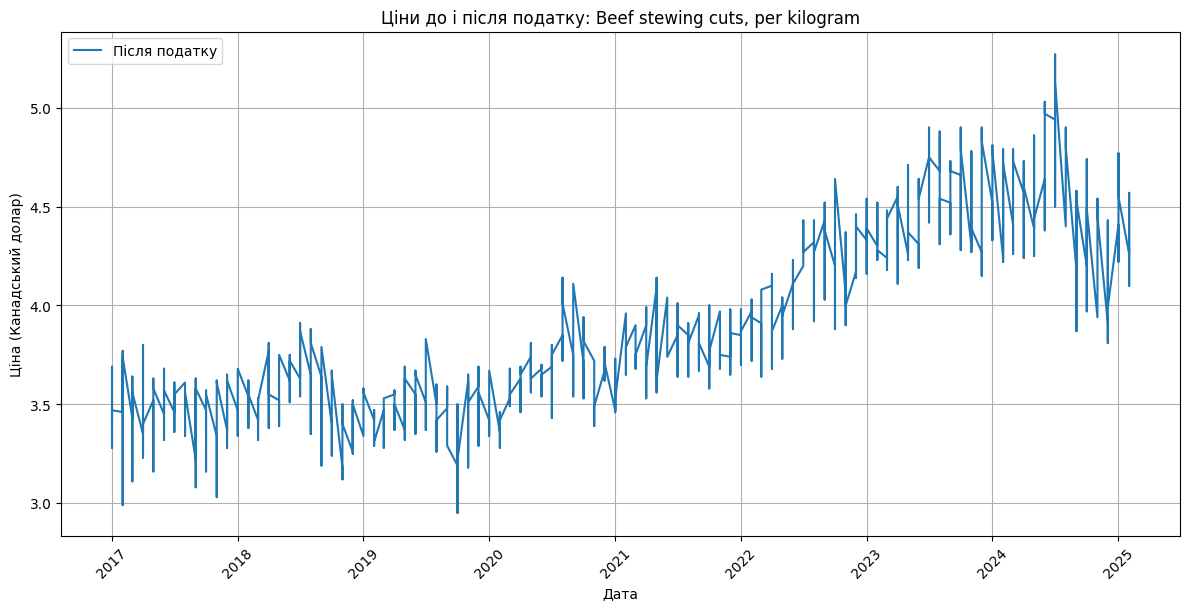

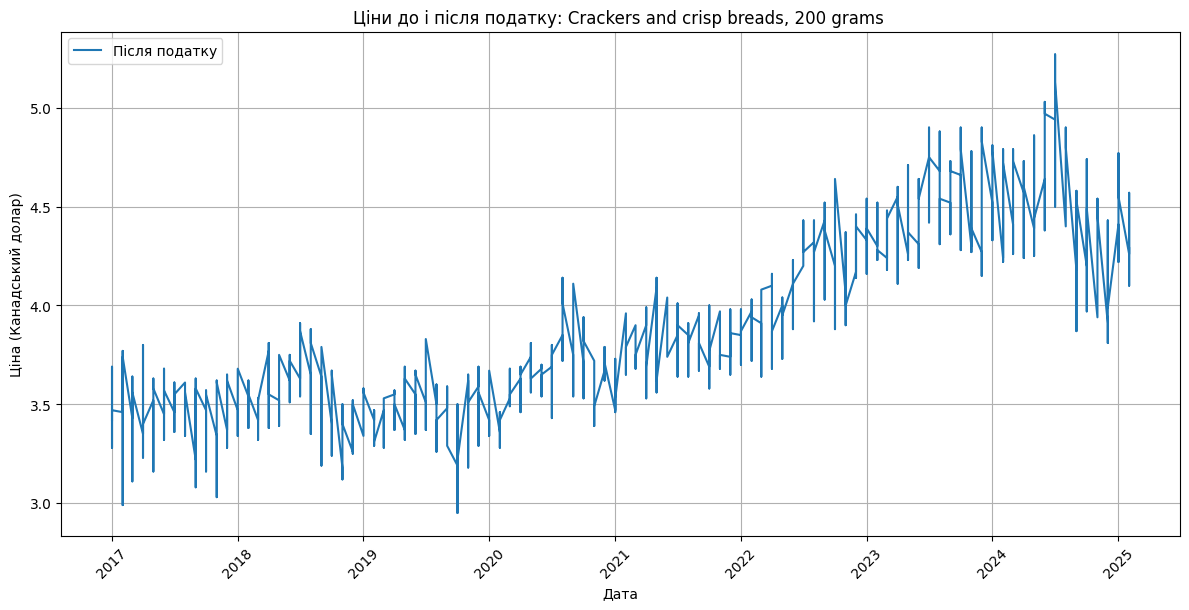

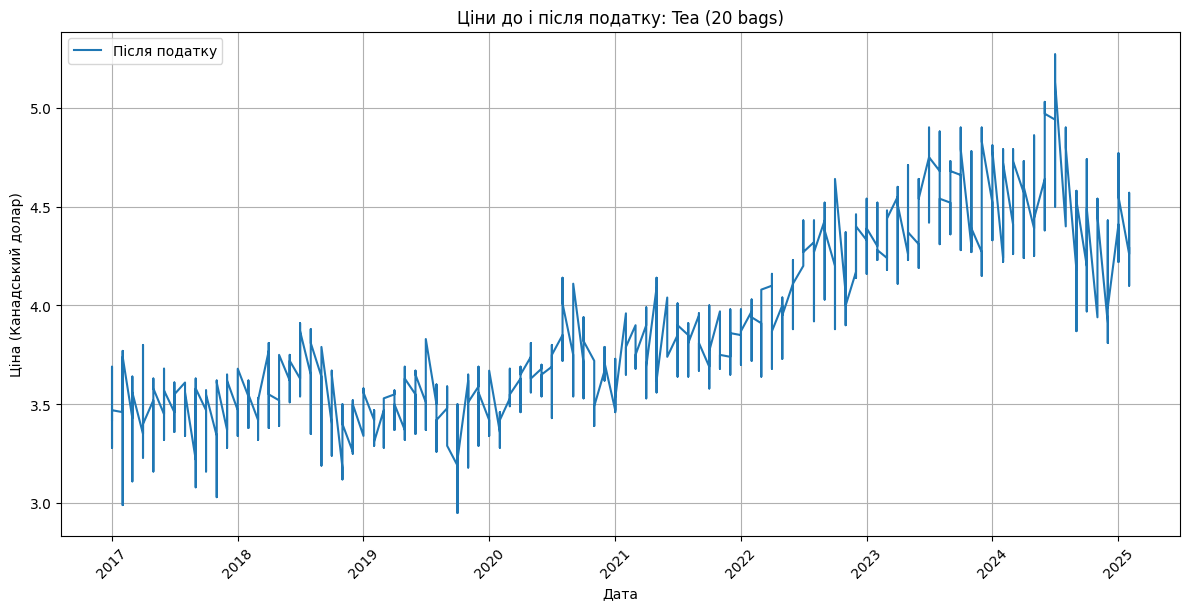

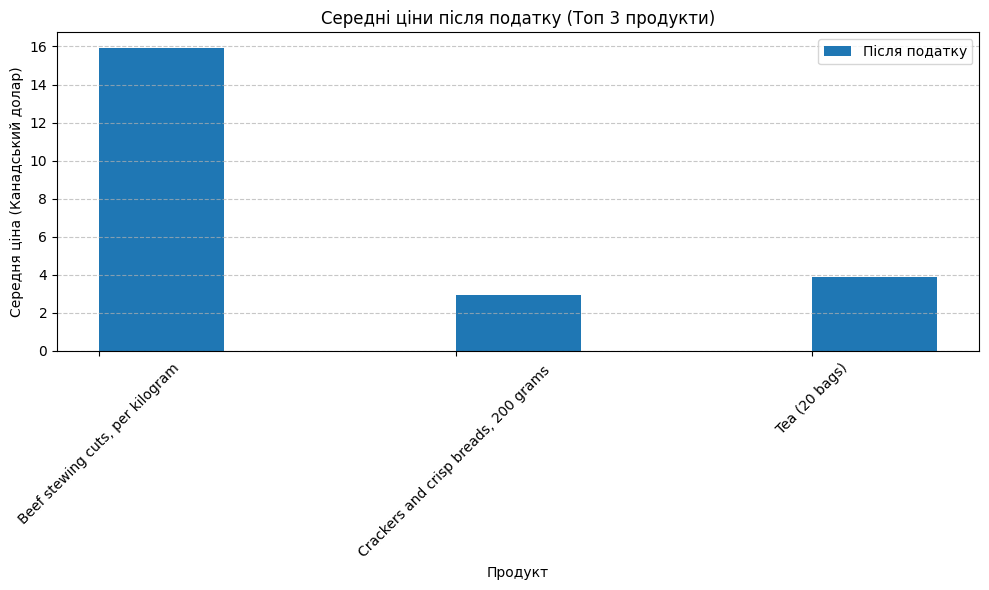

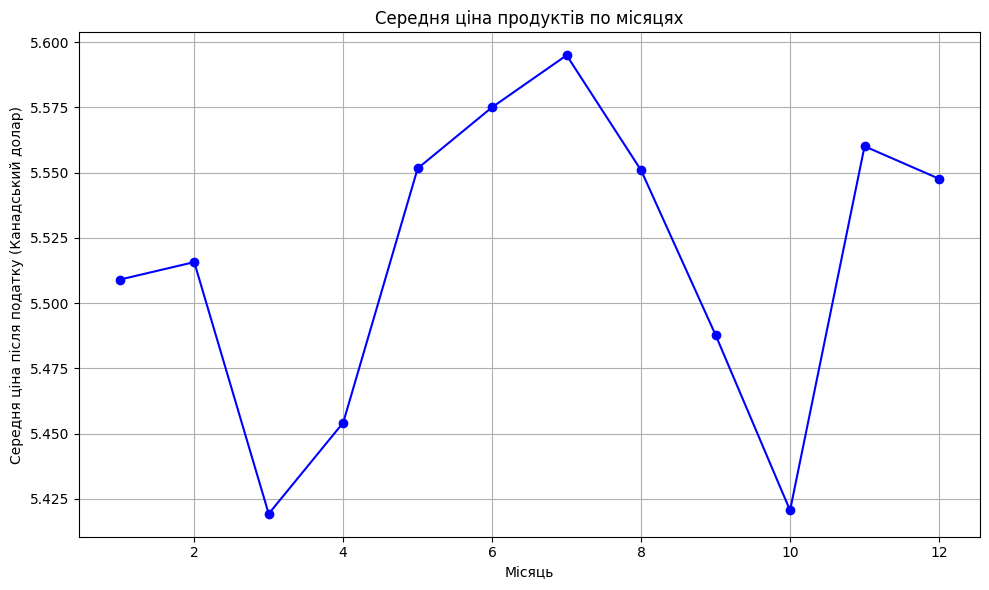

Найбільш стабільні продукти за ціною (менше стандартне відхилення):
                            Value after tax
Products                                   
Lemons, unit                       0.101073
Baby food, 128 millilitres         0.161970
Canned tuna, 170 grams             0.197547
Limes, unit                        0.205077
Bananas, per kilogram              0.210732


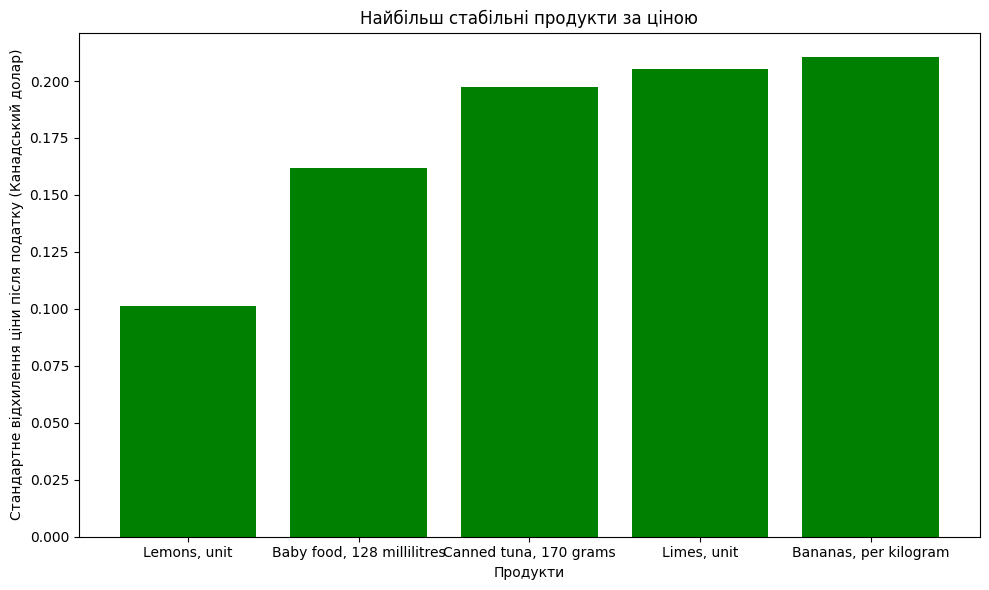

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

class LoadTask:
    def __init__(self):
        self.file_pt = 'Retail_Prices_of _Products.csv'
        self.df = pd.read_csv(self.file_pt)
        self.df['Date'] = pd.to_datetime(self.df['Month'] + ' ' + self.df['Year'].astype(str), format='%B %Y')


    def first_op(self):
        self.top_prod = self.df['Products'].value_counts().head(3).index.tolist()
        self.filtered_df = self.df[self.df['Products'].isin(self.top_prod)]

        plt.figure(figsize=(12, 6))

        for product in self.top_prod:
            self.product_data = self.filtered_df[self.filtered_df['Products'] == product]
            self.product_data = self.product_data.sort_values('Date')
            plt.plot(self.product_data['Date'], self.product_data['Value after tax'], label=product)

        plt.title('Зміна ціни продуктів з часом')
        plt.xlabel('Дата')
        plt.ylabel('Ціна після податку (Канадський долар)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.xticks(rotation=45)
        plt.show()

    def second_op(self):

        for product in self.top_prod:

            plt.figure(figsize=(12, 6))
            plt.plot(self.product_data['Date'], self.product_data['Value after tax'], label='Після податку')

            plt.title(f'Ціни до і після податку: {product}')
            plt.xlabel('Дата')
            plt.ylabel('Ціна (Канадський долар)')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.xticks(rotation=45)
            plt.show()

    def third_op(self):
        top_prod = self.df['Products'].value_counts().head(3).index.tolist()
        filtered_df = self.df[self.df['Products'].isin(top_prod)]

        avg_prices = filtered_df.groupby('Products')[['Value after tax']].mean()

        x = range(len(avg_prices))
        width = 0.35

        plt.figure(figsize=(10, 6))
        plt.bar([i + width / 2 for i in x], avg_prices['Value after tax'], width=width, label='Після податку')

        plt.title('Середні ціни після податку (Топ 3 продукти)')
        plt.xlabel('Продукт')
        plt.ylabel('Середня ціна (Канадський долар)')
        plt.xticks(ticks=x, labels=avg_prices.index, rotation=45)
        plt.legend()
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    def seasonal_analysis(self):
        self.df['Month_num'] = self.df['Date'].dt.month
        monthly_avg = self.df.groupby('Month_num')[['Value after tax']].mean()

        plt.figure(figsize=(10, 6))
        plt.plot(monthly_avg.index, monthly_avg['Value after tax'], marker='o', color='b')
        plt.title('Середня ціна продуктів по місяцях')
        plt.xlabel('Місяць')
        plt.ylabel('Середня ціна після податку (Канадський долар)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def price_stability(self):
        stability = self.df.groupby('Products')[['Value after tax']].std()
        stable_products = stability.sort_values('Value after tax').head(5)

        print("Найбільш стабільні продукти за ціною (менше стандартне відхилення):")
        print(stable_products)

        plt.figure(figsize=(10, 6))
        plt.bar(stable_products.index, stable_products['Value after tax'], color='g')
        plt.title('Найбільш стабільні продукти за ціною')
        plt.xlabel('Продукти')
        plt.ylabel('Стандартне відхилення ціни після податку (Канадський долар)')
        plt.tight_layout()
        plt.show()

st_op = LoadTask()
st_op.first_op()
st_op.second_op()
st_op.third_op()
st_op.seasonal_analysis()
st_op.price_stability()

